In [126]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [127]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [128]:
y_train = keras.utils.to_categorical(y_train, 10)#10 meaing n_classes
y_test = keras.utils.to_categorical(y_test, 10)

In [129]:
x_train.shape

(50000, 32, 32, 3)

In [130]:
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2)

In [131]:
x_train.shape

(40000, 32, 32, 3)

In [132]:
y_train.shape

(40000, 10)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


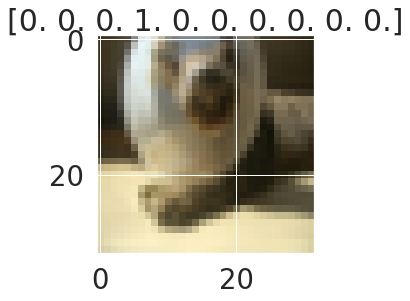

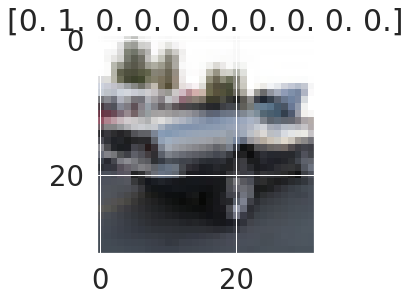

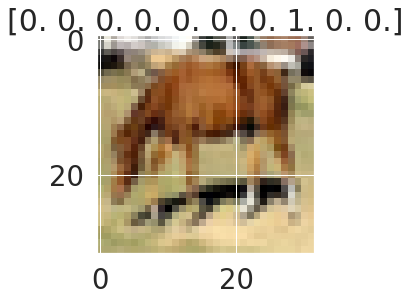

In [133]:
for i in range(3):
  plt.title(y_train[i])
  plt.imshow(x_train[i])
  plt.show()

In [134]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(32, 32, 3))
model.trainable = False
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [135]:
top_model = keras.Sequential()
top_model.add(model)
top_model.add(layers.GlobalAveragePooling2D())
top_model.add(layers.Flatten())
top_model.add(layers.Dense(10, activation='softmax'))

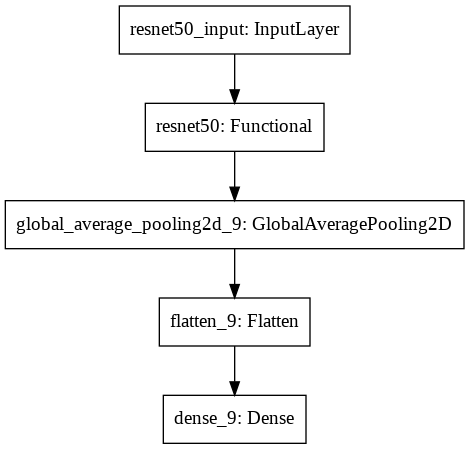

In [136]:
plot_model(top_model)

# ResNet 50

In [137]:
train_datagen = ImageDataGenerator(
  rescale = 1./255.,
  width_shift_range= 0.2,
  zoom_range = 0.3,
  horizontal_flip = True
)
val_datagen = ImageDataGenerator(
  rescale = 1./255.
)
test_datagen = ImageDataGenerator(
  rescale = 1./255.
)

In [138]:
train_generator = train_datagen.flow(
    x_train,y_train
)
validation_generator = val_datagen.flow(
    x_val,y_val
)
test_genrator = test_datagen.flow(
    x_test,y_test
)

In [139]:
top_model.compile(optimizer =keras.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [140]:
history_Res = top_model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 4s 50ms/step - loss: 2.5322 - accuracy: 0.1077 - val_loss: 2.3280 - val_accuracy: 0.1181
Epoch 2/500
39/39 [==============================] - 1s 27ms/step - loss: 2.2961 - accuracy: 0.1436 - val_loss: 2.3215 - val_accuracy: 0.1250
Epoch 3/500
39/39 [==============================] - 1s 27ms/step - loss: 2.3084 - accuracy: 0.1295 - val_loss: 2.2701 - val_accuracy: 0.1736
Epoch 4/500
39/39 [==============================] - 1s 28ms/step - loss: 2.2609 - accuracy: 0.1667 - val_loss: 2.2485 - val_accuracy: 0.1875
Epoch 5/500
39/39 [==============================] - 1s 27ms/step - loss: 2.2644 - accuracy: 0.1608 - val_loss: 2.3158 - val_accuracy: 0.1424
Epoch 6/500
39/39 [==============================] - 1s 27ms/step - loss: 2.2707 - accuracy: 0.1484 - val_loss: 2.2175 - val_accuracy: 0.1736
Epoch 7/500
39/39 [==============================] - 1s 27ms/step - loss: 2.2226 - accuracy: 0.1746 - val_loss: 2.1443 - val_accuracy: 0.2639
Epoch 

In [141]:
top_model.evaluate(test_genrator)

313/313 [==============================] - 4s 14ms/step - loss: 1.7769 - accuracy: 0.3686


[1.7769087553024292, 0.3686000108718872]

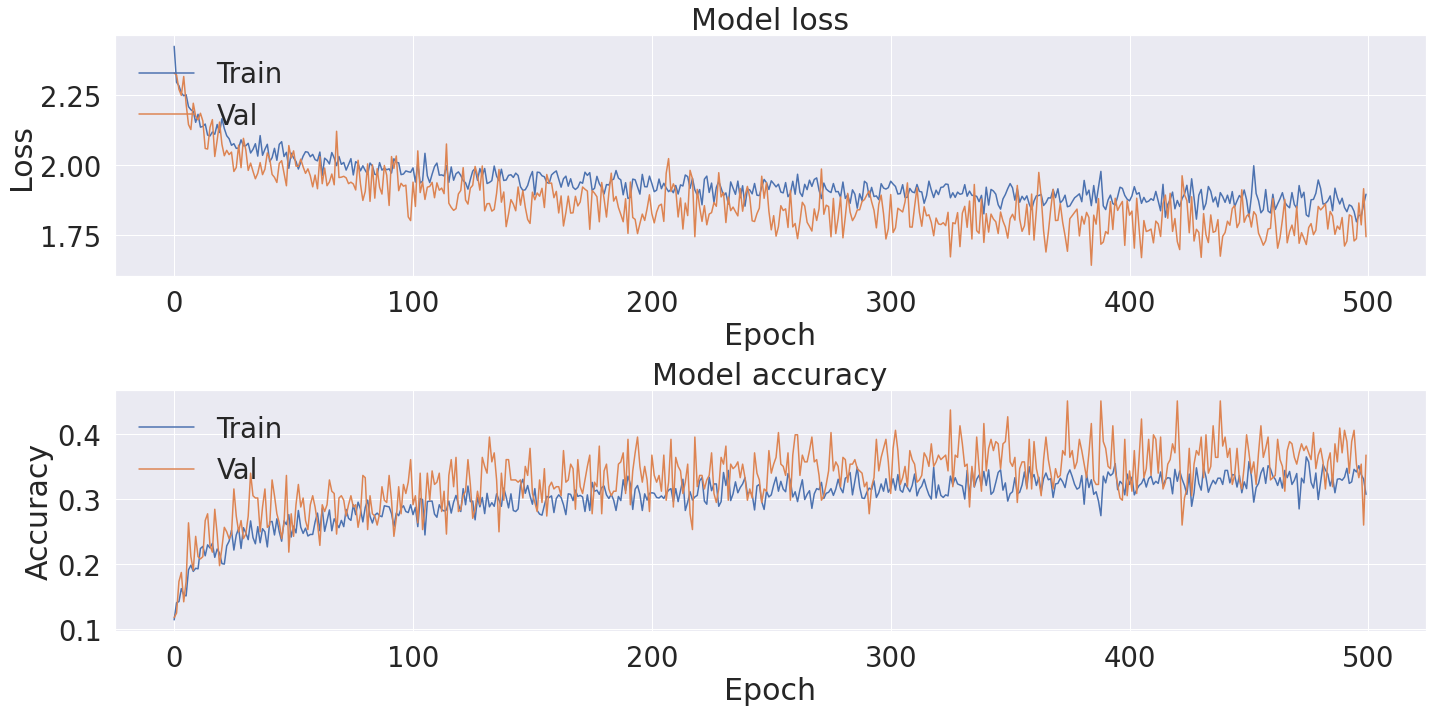

In [142]:
f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(history_Res.history['loss'])
ax[0].plot(history_Res.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_Res.history['accuracy'])
ax[1].plot(history_Res.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

In [143]:
model.trainable = True

In [144]:
set_trainable = False

for layer in model.layers:
  if layer.name == 'conv5_block1_1_conv':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [145]:
for layer in model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff3b411fa10> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7ff0ff232650> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff0ff1e2cd0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7ff0ff1db7d0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7ff0ff1a1690> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7ff0ff133950> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff0ff12d8d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff0ff139510> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7ff0ff146190> False
<tensorflow.python.keras.layers.core.Activation object at 0x7ff0ff155890> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff0ff1a1dd0> False
<tensorflow.python.keras.laye

In [146]:
top_model.compile(optimizer =keras.optimizers.Adam(lr=1e-5),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [147]:
history_Res_fineTuning = top_model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 6s 59ms/step - loss: 8.1898 - accuracy: 0.1442 - val_loss: 2.3460 - val_accuracy: 0.1806
Epoch 2/500
39/39 [==============================] - 1s 35ms/step - loss: 8.2438 - accuracy: 0.1626 - val_loss: 2.4694 - val_accuracy: 0.1007
Epoch 3/500
39/39 [==============================] - 1s 35ms/step - loss: 6.3720 - accuracy: 0.1479 - val_loss: 2.4119 - val_accuracy: 0.1042
Epoch 4/500
39/39 [==============================] - 1s 35ms/step - loss: 6.6560 - accuracy: 0.1554 - val_loss: 2.4403 - val_accuracy: 0.1250
Epoch 5/500
39/39 [==============================] - 1s 35ms/step - loss: 6.0187 - accuracy: 0.1655 - val_loss: 2.3990 - val_accuracy: 0.1181
Epoch 6/500
39/39 [==============================] - 1s 34ms/step - loss: 5.7203 - accuracy: 0.1664 - val_loss: 2.4568 - val_accuracy: 0.0833
Epoch 7/500
39/39 [==============================] - 1s 34ms/step - loss: 5.7463 - accuracy: 0.1719 - val_loss: 2.5285 - val_accuracy: 0.0903
Epoch 

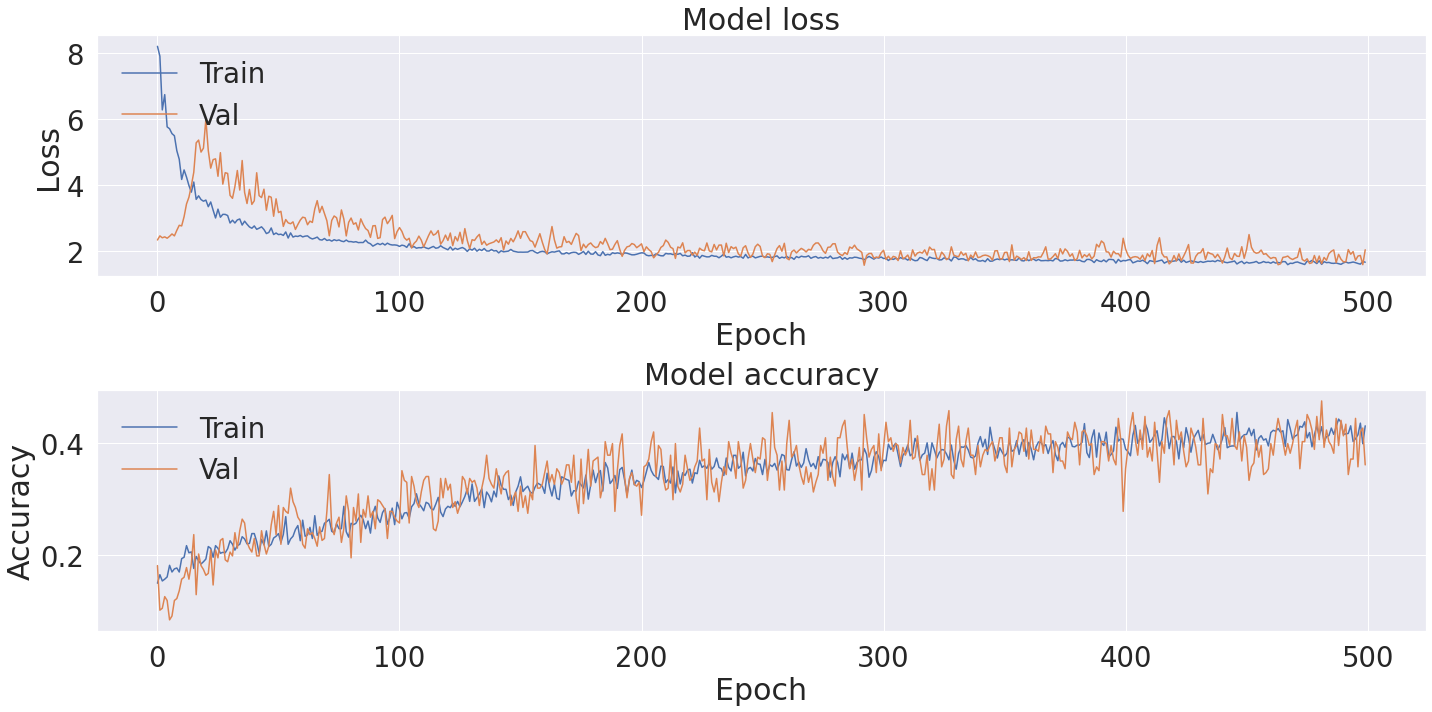

In [149]:
f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(history_Res_fineTuning.history['loss'])
ax[0].plot(history_Res_fineTuning.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_Res_fineTuning.history['accuracy'])
ax[1].plot(history_Res_fineTuning.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

# Nomal CNN

In [150]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = keras.utils.to_categorical(y_train, 10)#10 mean n_classes
y_test = keras.utils.to_categorical(y_test, 10)

x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2)

In [151]:
train_datagen = ImageDataGenerator(
  rescale = 1./255.,
  width_shift_range= 0.2,
  zoom_range = 0.3,
  horizontal_flip = True
)
val_datagen = ImageDataGenerator(
  rescale = 1./255.
)
test_datagen = ImageDataGenerator(
  rescale = 1./255.
)

In [152]:

train_generator = train_datagen.flow(
    x_train,y_train
)
validation_generator = val_datagen.flow(
    x_val,y_val
)
test_genrator = test_datagen.flow(
    x_test,y_test
)

In [153]:
#modeling

inputs = layers.Input(shape=(32,32,3))

net = layers.Conv2D(32,5,1,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Conv2D(64,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Conv2D(128,3,1,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)

net = layers.Flatten()(net)
net = layers.Dense(500)(net)
net = layers.Dropout(0.5)(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model_A = tf.keras.Model(inputs = inputs, outputs = net, name = 'CNN')

In [154]:
model_A.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0       

In [155]:
model_A.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [156]:
history_A = model_A.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 2s 22ms/step - loss: 2.3514 - accuracy: 0.1889 - val_loss: 2.1506 - val_accuracy: 0.2431
Epoch 2/500
39/39 [==============================] - 1s 18ms/step - loss: 2.0332 - accuracy: 0.2777 - val_loss: 2.1299 - val_accuracy: 0.2049
Epoch 3/500
39/39 [==============================] - 1s 18ms/step - loss: 1.9996 - accuracy: 0.2590 - val_loss: 1.9771 - val_accuracy: 0.3056
Epoch 4/500
39/39 [==============================] - 1s 19ms/step - loss: 1.9451 - accuracy: 0.3329 - val_loss: 1.8649 - val_accuracy: 0.2986
Epoch 5/500
39/39 [==============================] - 1s 18ms/step - loss: 1.9121 - accuracy: 0.3222 - val_loss: 2.1962 - val_accuracy: 0.1562
Epoch 6/500
39/39 [==============================] - 1s 19ms/step - loss: 1.8513 - accuracy: 0.3371 - val_loss: 2.2086 - val_accuracy: 0.2188
Epoch 7/500
39/39 [==============================] - 1s 18ms/step - loss: 1.7806 - accuracy: 0.3466 - val_loss: 1.9266 - val_accuracy: 0.3125
Epoch 

In [157]:
model_A.evaluate(test_genrator,batch_size=64)


313/313 [==============================] - 1s 4ms/step - loss: 0.8338 - accuracy: 0.7151


[0.8337579965591431, 0.7150999903678894]

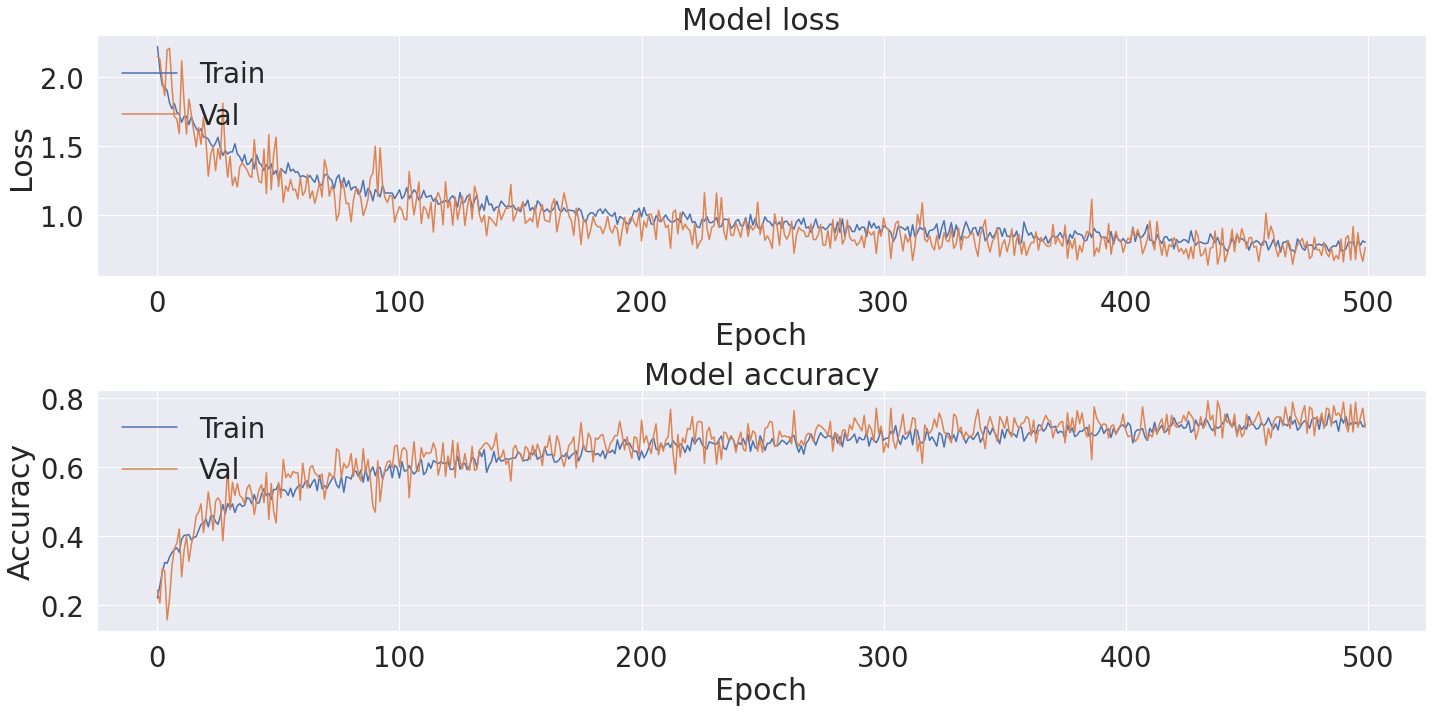

In [158]:
f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(history_A.history['loss'])
ax[0].plot(history_A.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_A.history['accuracy'])
ax[1].plot(history_A.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

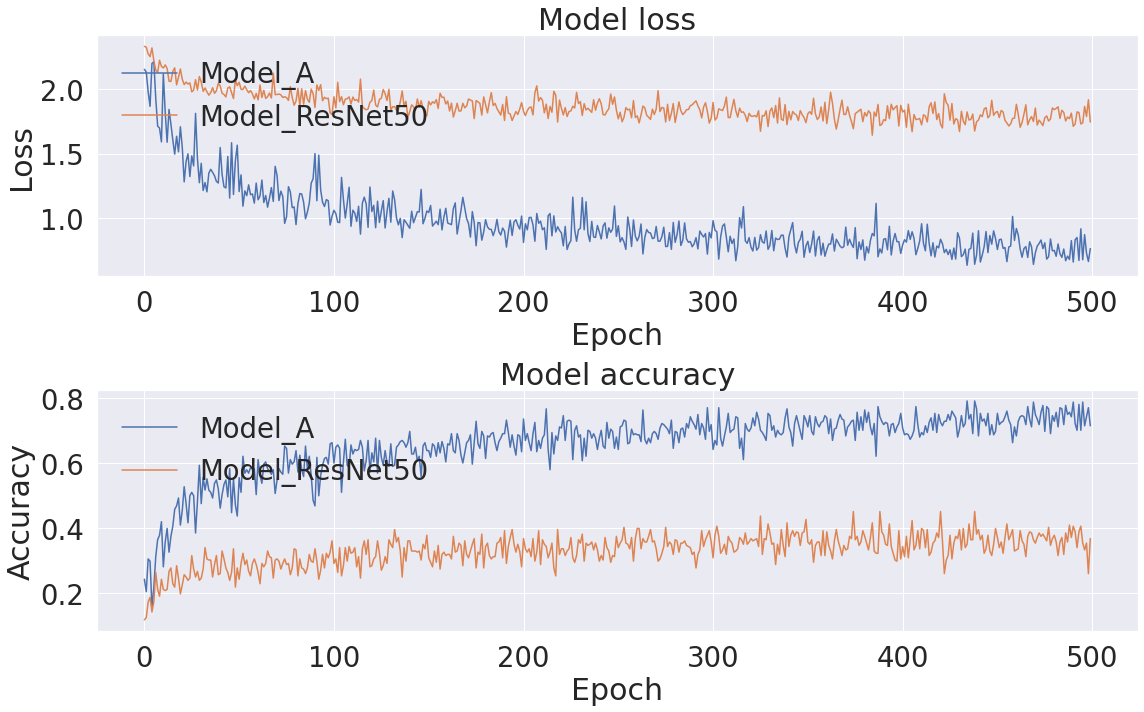

In [165]:
f,ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(history_A.history['val_loss'])
ax[0].plot(history_Res.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Model_A', 'Model_ResNet50'], loc='upper left')

ax[1].plot(history_A.history['val_accuracy'])
ax[1].plot(history_Res.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Model_A', 'Model_ResNet50'], loc='upper left')

f.tight_layout()
plt.show()

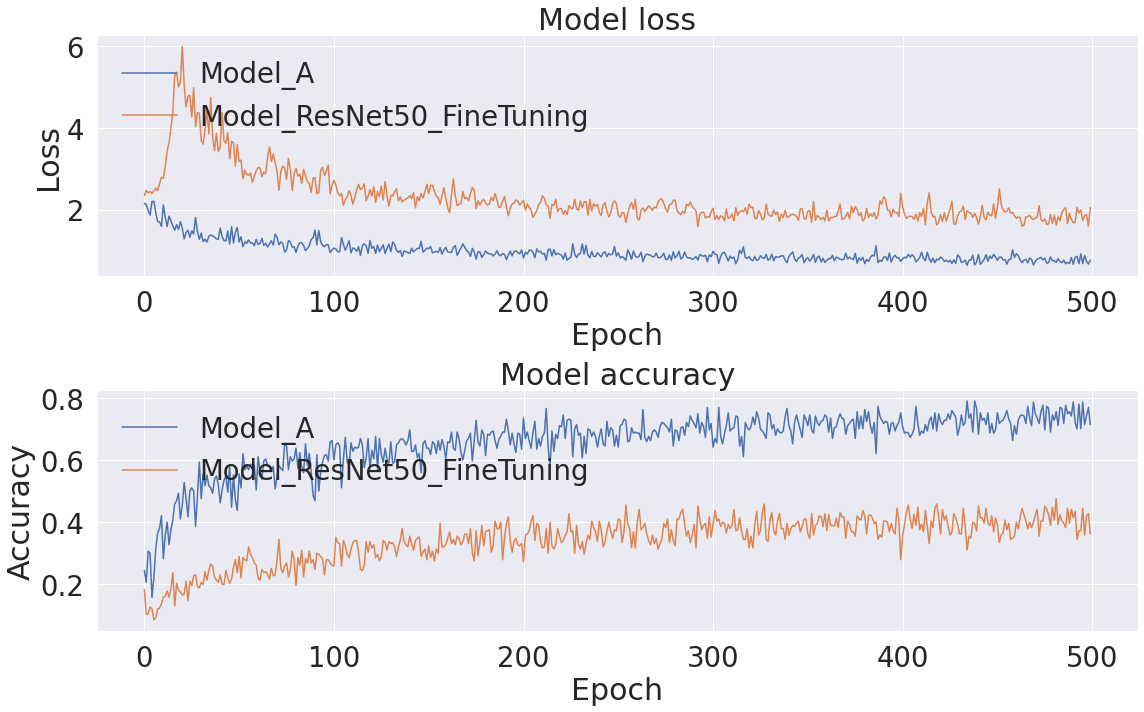

In [166]:
f,ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(history_A.history['val_loss'])
ax[0].plot(history_Res_fineTuning.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Model_A', 'Model_ResNet50_FineTuning'], loc='upper left')

ax[1].plot(history_A.history['val_accuracy'])
ax[1].plot(history_Res_fineTuning.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Model_A', 'Model_ResNet50_FineTuning'], loc='upper left')

f.tight_layout()
plt.show()

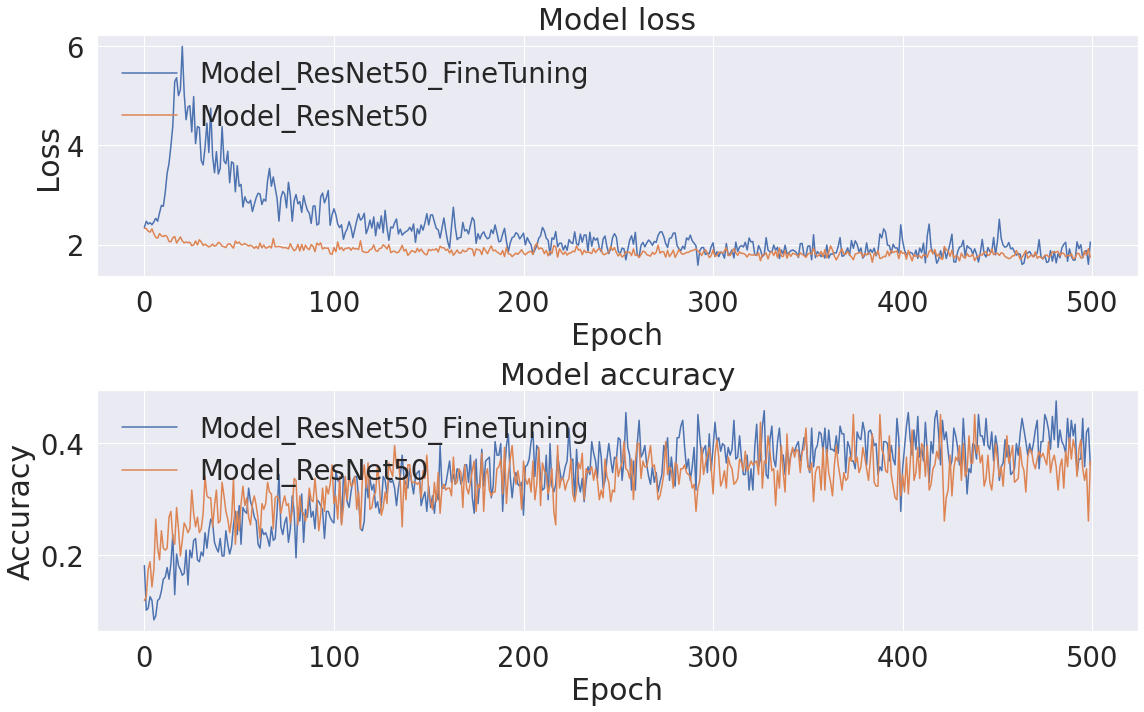

In [167]:
f,ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(history_Res_fineTuning.history['val_loss'])
ax[0].plot(history_Res.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Model_ResNet50_FineTuning', 'Model_ResNet50'], loc='upper left')

ax[1].plot(history_Res_fineTuning.history['val_accuracy'])
ax[1].plot(history_Res.history['val_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Model_ResNet50_FineTuning', 'Model_ResNet50'], loc='upper left')

f.tight_layout()
plt.show()